# k-Nearest Neighbour Classification

In [1]:
# Load relevant packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
from sklearn import neighbors

In [2]:
# Load the data
fullData = pd.read_csv('data/monthlyData.csv')

# Make a small dataset with "labels"
smallData = fullData[["ISO_3DIGIT","Annual_temp", "Annual_precip", "tropical","labels"]]
# What happens to the PLA when the training data is not linearly separable? 


In [3]:
trainData = smallData[:150]
testData = smallData[150:]

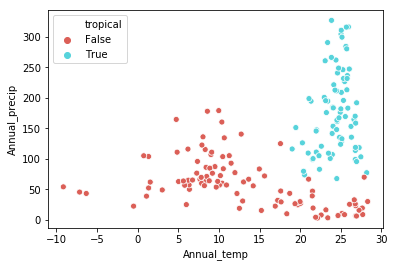

In [4]:
sns.scatterplot(x="Annual_temp",y="Annual_precip",hue="tropical",data=smallData, palette=sns.color_palette("hls", 2))

In [5]:
# Prepare training and test data
xTrain = trainData.iloc[:,1:-2].values
nTrain = xTrain.shape[0]
yTrain = trainData.iloc[:,-1].values

## Process test data
xTest = testData.iloc[:,1:-2].values
nTest = xTest.shape[0]

yTest = testData.iloc[:,-1].values


In [7]:
yTrain

array([False,  True, False, False, False, False, False, False, False,
        True, False,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True, False, False,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True, False,  True,  True,  True, False,  True, False,  True,
        True, False, False, False, False, False, False,  True,  True,
        True,  True,

### As k-NN is based on computing distances between neighbours, it is imperative to perform feature scaling!
$X' = \frac{(X-mean(X))}{std(X)} $

In [6]:
# Perform standard normalization on the training set. 
trMean = xTrain.mean(0)
trStd = xTrain.std(0)
print(trStd,trMean)
xTrainRes = (xTrain-trMean)/trStd
print(xTrainRes.std(0),xTrainRes.mean(0))
# Use the obtained mean and standard deviation to standardize the test set
xTestRes = (xTest-trMean)/trStd

[ 8.78535281 81.3418132 ] [ 17.81346667 115.03024667]
[1. 1.] [-2.96059473e-18 -7.10542736e-17]


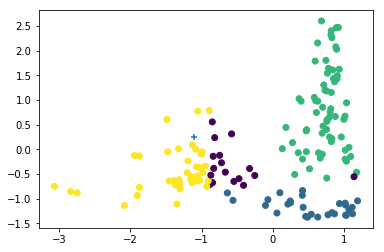

In [7]:
plt.scatter(xTrainRes[:,0],xTrainRes[:,1],c=yTrain)
plt.scatter(xTestRes[0,0],xTestRes[0,1],marker='+')

In [8]:
# Implement k-Nearest Neighbour classifier by completing this function

# Functions such as np.argsort() can be useful here

# Load the pairwise distance module
from sklearn.metrics import pairwise_distances

def kNN(X,Y,xTest,neighbors=1):
    nTest = len(xTest)
    yPred = np.zeros(nTest)
    
    # Compute pairwise distance between each test and training data point
    dist = pairwise_distances(xTest,X)
    
    # Obtain the indices of the k-nearest neighbours
    nNgbrs = np.argsort(dist)[:,:neighbors]
    
    # Obtain the votes of these k-NN
    votes = Y[nNgbrs]
    
    # Predict the test set labels based on majority voting
    for i in range(nTest):
        yPred[i] = np.argmax(np.bincount(votes[i]))
        
    return yPred


In [9]:
X = xTrainRes[:4,:]
Y = yTrain[:4]
xT = xTestRes[:2,:]

In [10]:
dist = pairwise_distances(xT,X)
print(dist)
distSorted = np.argsort(dist)
print(distSorted)
votes = Y[distSorted]
print(votes)


[[1.4058427  1.59946015 0.52827855 2.66554154]
 [1.34908728 2.31708954 1.22730134 2.95683334]]
[[2 0 1 3]
 [2 0 1 3]]
[[0 1 2 1]
 [0 1 2 1]]


In [11]:
# Obtain predictions and print accuracy
neighbors=3
yPred = kNN(xTrain,yTrain,xTest,neighbors)
acc = 1-(np.sum(yTest != yPred))/len(yTest)
print('Test Accuracy of the KNN classifier is %f'%acc)


Test Accuracy of the KNN classifier is 0.892857


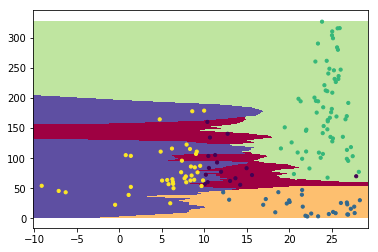

In [12]:
# Plot the decision boundaries
h = 0.1
x_min, x_max = xTrain[:, 0].min() - 1, xTrain[:, 0].max() + 1
y_min, y_max = xTrain[:, 1].min() - 1, xTrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
zInput = np.c_[xx.ravel(), yy.ravel()]
Z = kNN(xTrain, yTrain, zInput,neighbors)
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z,cmap="Spectral")
plt.scatter(xTrain[:,0],xTrain[:,1],c=yTrain,s=10)
#plt.scatter(xTest[:,0],xTest[:,1],c=yPred,s=10)


Test Accuracy of the KNN classifier with 1 neighbours, is 0.857143
Test Accuracy of the KNN classifier with 5 neighbours, is 0.928571
Test Accuracy of the KNN classifier with 9 neighbours, is 0.857143
Test Accuracy of the KNN classifier with 13 neighbours, is 0.857143
Test Accuracy of the KNN classifier with 17 neighbours, is 0.857143
Test Accuracy of the KNN classifier with 21 neighbours, is 0.821429
Test Accuracy of the KNN classifier with 25 neighbours, is 0.785714
Test Accuracy of the KNN classifier with 29 neighbours, is 0.785714
Test Accuracy of the KNN classifier with 33 neighbours, is 0.785714
Test Accuracy of the KNN classifier with 37 neighbours, is 0.785714
Test Accuracy of the KNN classifier with 41 neighbours, is 0.785714
Test Accuracy of the KNN classifier with 45 neighbours, is 0.785714
Test Accuracy of the KNN classifier with 49 neighbours, is 0.785714


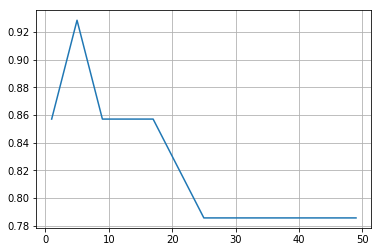

In [67]:
numNgbrs = np.arange(1,52,4)
testAcc = np.zeros(len(numNgbrs))

for n in range(len(numNgbrs)):
    yPred = kNN(xTrain,yTrain,xTest,numNgbrs[n])
    testAcc[n] = 1-(np.sum(yTest != yPred))/len(yTest)
    print('Test Accuracy of the KNN classifier with %d neighbours, is %f'%(numNgbrs[n],testAcc[n]))

plt.plot(numNgbrs,testAcc)
plt.grid()

In [56]:
numNgbrs = np.arange(1,22,2)
testAcc = np.zeros(len(numNgbrs))
numNgbrs

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

# Cross validation on the dataset
### Task: Perform 5 fold cross validation and report aggregate test performance of the KNN classifier with k=[1,3,11,21]

In [80]:
# Use 175 data points. Leave the last three out, for instance.

smallData = smallData[:175]
# Prepare training and test data
xTrain = smallData.iloc[:,1:-2].values
nTrain = xTrain.shape[0]

yTrain = smallData.iloc[:,-1].values

# Perform standard normalization on the training set. 
trMean = xTrain.mean(0)
trStd = xTrain.std(0)
print(trStd,trMean)
xTrainRes = (xTrain-trMean)/trStd
print(xTrainRes.std(0),xTrainRes.mean(0))


[ 8.66949059 79.73725703] [ 17.92942857 113.42474286]
[1. 1.] [-2.36636108e-16 -2.18238126e-16]


In [119]:
kRange = np.asarray([1,3,5,11,21,31,51])
ndata = len(smallData)
nFold = 5
nElFold = ndata/nFold
print(nElFold)
foldIdx = np.arange(ndata).reshape(-1,nFold)
xT = xTrainRes[foldIdx[:,0],:]

folds = np.arange(nFold)
print(folds)
print(np.delete(folds,1))

35.0
[0 1 2 3 4]
[0 2 3 4]


In [120]:
testAcc = np.zeros((len(kRange),len(folds)))
for k in range(len(kRange)):
    for fold in folds:
        xT = xTrainRes[foldIdx[:,fold],:]
        yT = yTrain[foldIdx[:,fold]].reshape(-1)
        X = xTrainRes[foldIdx[:,np.delete(folds,fold)],:].reshape(-1,2)
        Y = yTrain[foldIdx[:,np.delete(folds,fold)]].reshape(-1)
        yPred = kNN(X,Y,xT,kRange[k])
        testAcc[k,fold] = 1-(np.sum(yT != yPred))/len(yT)
        print('Test Accuracy of the KNN classifier for fold %d, is %f with k=%d'%(fold,testAcc[k,fold],k));
    

Test Accuracy of the KNN classifier for fold 0, is 0.942857 with k=0
Test Accuracy of the KNN classifier for fold 1, is 0.942857 with k=0
Test Accuracy of the KNN classifier for fold 2, is 0.942857 with k=0
Test Accuracy of the KNN classifier for fold 3, is 0.971429 with k=0
Test Accuracy of the KNN classifier for fold 4, is 0.971429 with k=0
Test Accuracy of the KNN classifier for fold 0, is 0.942857 with k=1
Test Accuracy of the KNN classifier for fold 1, is 0.885714 with k=1
Test Accuracy of the KNN classifier for fold 2, is 0.942857 with k=1
Test Accuracy of the KNN classifier for fold 3, is 0.942857 with k=1
Test Accuracy of the KNN classifier for fold 4, is 0.942857 with k=1
Test Accuracy of the KNN classifier for fold 0, is 0.942857 with k=2
Test Accuracy of the KNN classifier for fold 1, is 0.885714 with k=2
Test Accuracy of the KNN classifier for fold 2, is 0.942857 with k=2
Test Accuracy of the KNN classifier for fold 3, is 0.914286 with k=2
Test Accuracy of the KNN classifie

In [117]:
print(testAcc)
testAcc.mean(1)

[[0.94285714 0.94285714 0.94285714 0.97142857 0.97142857]
 [0.94285714 0.88571429 0.94285714 0.94285714 0.94285714]
 [0.94285714 0.88571429 0.94285714 0.91428571 0.94285714]
 [0.94285714 0.91428571 0.91428571 0.94285714 0.88571429]
 [0.91428571 0.91428571 0.88571429 0.94285714 0.85714286]]


array([0.95428571, 0.93142857, 0.92571429, 0.92      , 0.90285714])

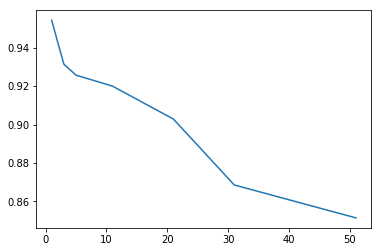

In [121]:
plt.plot(kRange,testAcc.mean(1))

# Model selection using nested cross validation
## Hyper-parameter of the k-NN algorithm is the "k". How do we choose k? 
* Split the data into say, 5 folds. 
* Use 3 folds for training and one fold for validation. 
* Try different k=[1,3,11,21]
* Choose the model with best validation error
* Report test set on the last fold.

Repeat this process for each configuration of folds.
